# Project Title & Description


# 🎓 Placement Package Prediction System

This project predicts a student's **placement package (LPA)** based on their **CGPA** using **Linear Regression**.

### Objectives
- Understand Linear Regression
- Visualize CGPA vs Package relationship
- Predict package for user input CGPA


### Import Required Libraries



In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### Load Dataset

In [37]:
# Dataset information
data.info()

# Statistical summary
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


### Feature & Target Selection


In [38]:
X = data[["cgpa"]]     # Independent variable
y = data["package"]   # Target variable

X.shape, y.shape


((200, 1), (200,))

### Train-Test Split


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((160, 1), (40, 1))

### Model Training


In [27]:
# Initialize Linear Regression model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Model Parameters

In [28]:
# Model coefficients
m = model.coef_[0]
b = model.intercept_

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")


Slope (m): 0.5742564727019197
Intercept (b): -1.0270069374542108


## Regression Visualization


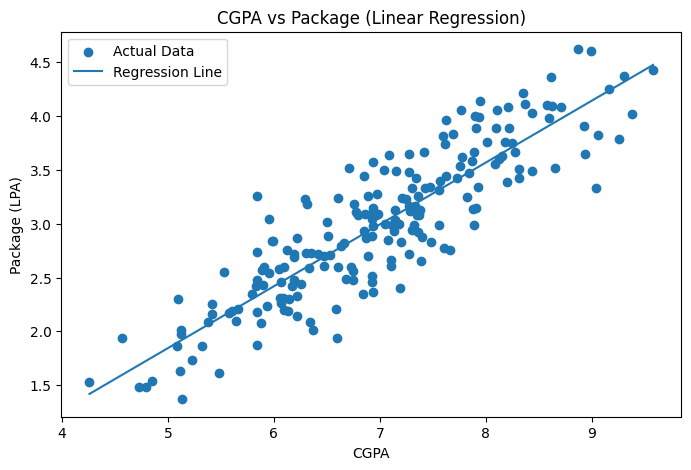

In [29]:
# Sort data for clean regression line
X_sorted = X.sort_values(by="cgpa")
y_pred_line = model.predict(X_sorted)

plt.figure(figsize=(8,5))
plt.scatter(X, y, label="Actual Data")
plt.plot(X_sorted, y_pred_line, label="Regression Line")
plt.xlabel("CGPA")
plt.ylabel("Package (LPA)")
plt.title("CGPA vs Package (Linear Regression)")
plt.legend()
plt.show()


###  Model Prediction (Test Sample)

In [31]:
# Predict for first test sample
sample_cgpa = X_test.iloc[0][0]
predicted_package = model.predict(X_test.iloc[[0]])

sample_cgpa, predicted_package


C:\Users\rajus\AppData\Local\Temp\ipykernel_3228\2876078102.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_cgpa = X_test.iloc[0][0]


(np.float64(6.63), array([2.78031348]))

### User Input Prediction

In [32]:
cgpa_input = float(input("Enter your CGPA: "))
predicted_package = model.predict([[cgpa_input]])

print(f"Predicted Package: {predicted_package[0]:.2f} LPA")


Enter your CGPA:  8.85


Predicted Package: 4.06 LPA


C:\Users\rajus\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Plot User Prediction

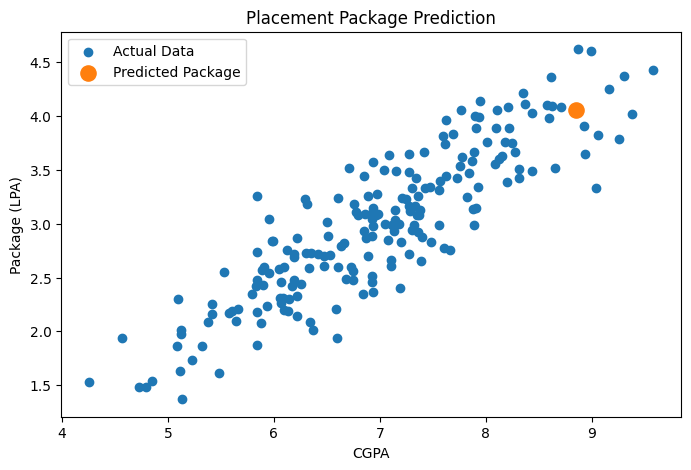

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, label="Actual Data")
plt.scatter(cgpa_input, predicted_package, s=120, label="Predicted Package")
plt.xlabel("CGPA")
plt.ylabel("Package (LPA)")
plt.title("Placement Package Prediction")
plt.legend()
plt.show()


### Model Evaluation

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))


MAE: 0.23150985393278373
MSE: 0.08417638361329656
R2 Score: 0.7730984312051673


## ✅ Conclusion

- Linear Regression successfully modeled the relationship between CGPA and placement package
- The model provides reasonable predictions for unseen data
- This project demonstrates an end-to-end Machine Learning workflow
